![CC](https://i.creativecommons.org/l/by/4.0/88x31.png)

This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

# Approximating the flow past a cylinder with limited data

In this notebook, we cover the following topics:

1. Physics-informed neural networks

In [2]:
import torch as pt
import matplotlib.pyplot as plt

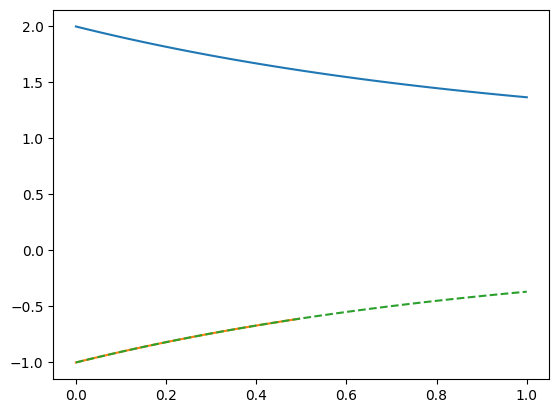

In [18]:
x_i = pt.linspace(0, 1, 100, requires_grad=True)
f_xi = 1.0 + pt.exp(-x_i)
df_dxi = pt.autograd.grad(f_xi.sum(), x_i)[0]
plt.plot(x_i.detach(), f_xi.detach())
plt.plot(x_i[:50].detach(), df_dxi[:50].detach())
plt.plot(x_i.detach(), -pt.exp(-x_i).detach(), ls="--")

plt.show()

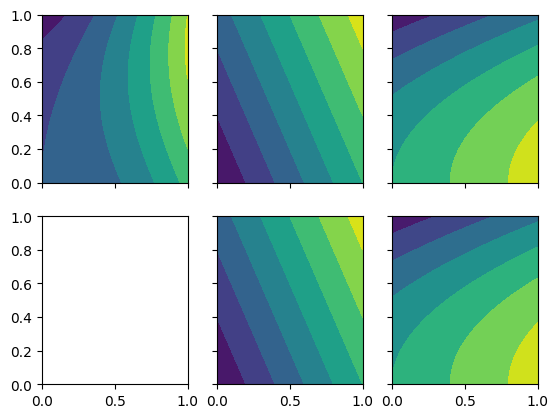

In [30]:
x_i = pt.linspace(0, 1, 100, requires_grad=True)
y_i = pt.linspace(0, 1, 100, requires_grad=True)
f_xi_yi = x_i**2 - 0.5*y_i**3 + x_i*y_i
f_sum = f_xi_yi.sum()
df_dx = pt.autograd.grad(f_sum, x_i)[0]
#df_dy = pt.autograd.grad(f_sum, y_i)[0]
xx, yy = pt.meshgrid(x_i.detach(), y_i.detach(), indexing="ij")
xx_flat = xx.flatten()
xx_flat.requires_grad = True
yy_flat = yy.flatten()
yy_flat.requires_grad = True
ff = xx_flat**2 - 0.5*yy_flat**3 + xx_flat*yy_flat
#grad_ff = pt.autograd.grad(ff.sum(), (xx_flat, yy_flat))
#dx_ff = grad_ff[0].detach()
#dy_ff = grad_ff[1].detach()
dx_ff = pt.autograd.grad(ff.sum(), xx_flat, retain_graph=True)[0].detach()
dy_ff = pt.autograd.grad(ff.sum(), yy_flat)[0].detach()
f_plot = xx**2 - 0.5*yy**3 + xx*yy
fig, axarr = plt.subplots(2, 3, sharex=True, sharey=True)
axarr[0, 0].contourf(xx, yy, f_plot)
axarr[0, 1].contourf(xx, yy, 2*xx+yy)
axarr[0, 2].contourf(xx, yy, -0.5*3*yy**2 + xx)
axarr[1, 1].contourf(xx, yy, dx_ff.reshape((100, 100)))
axarr[1, 2].contourf(xx, yy, dy_ff.reshape((100, 100)))
#plt.plot(x_i.detach(), f_xi.detach())
#plt.plot(x_i.detach(), df_dxi.detach())

plt.show()

In [ ]:
# is summing + gradient more efficient than grad + summing?

https://stackoverflow.com/questions/46774641/what-does-the-parameter-retain-graph-mean-in-the-variables-backward-method
https://discuss.pytorch.org/t/when-is-retain-graph-false-and-create-graph-true-useful/86091
https://stackoverflow.com/questions/54754153/autograd-grad-for-tensor-in-pytorch
https://l-infinity.de/posts/torch-unit-diffops/

